<a href="https://colab.research.google.com/github/chsrinidh/AIML-Lab/blob/main/AIML_assigment(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import fetch_openml
car_dataset = fetch_openml(name='car', version=1, as_frame=True, parser='auto')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


In [3]:
data_dict = {
    "data": car_dataset.data,
    "target": car_dataset.target,
    "feature_names": car_dataset.feature_names,
    "DESCR": car_dataset.DESCR,
    "frame": car_dataset.frame
}

In [4]:
for feature in data_dict['feature_names']:
  print(f"- {feature}:")
  if data_dict['data'][feature].dtype == 'object':
    unique_values = data_dict['data'][feature].unique()
    print(f"  Possible values: {', '.join(unique_values)}")
  else:
    print(f"  Data type: {data_dict['data'][feature].dtype}")

- buying:
  Data type: category
- maint:
  Data type: category
- doors:
  Data type: category
- persons:
  Data type: category
- lug_boot:
  Data type: category
- safety:
  Data type: category


In [5]:
df = pd.DataFrame(data_dict['data'], columns=data_dict['feature_names'])
df['target'] = data_dict['target']

In [7]:
print(df)

     buying  maint  doors persons lug_boot safety target
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [8]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
target,0


In [9]:
y = df['target']

In [10]:
import seaborn as sns

In [14]:
import seaborn as sns
import pandas as pd

df_encoded = df.copy()
categorical_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']  # Include 'target' in the list of columns to encode
mapping_dicts = {}
for col in categorical_cols:
    unique_values = df_encoded[col].unique()
    mapping_dicts[col] = {value: i for i, value in enumerate(unique_values)}
for col, mapping_dict in mapping_dicts.items():
    df_encoded[col] = df_encoded[col].map(mapping_dict)

        buying  maint  doors  persons  lug_boot  safety  target
count     1728   1728   1728     1728      1728    1728    1728
unique       4      4      4        3         3       3       4
top          1      1      0        0         2       2       0
freq       432    432    432      576       576     576    1210
                buying         maint         doors       persons  \
buying    1.000000e+00 -1.163678e-15  2.288293e-16  1.856658e-16   
maint    -1.163678e-15  1.000000e+00  2.744718e-16  3.702055e-17   
doors     2.288293e-16  2.744718e-16  1.000000e+00  1.956599e-17   
persons   1.856658e-16  3.702055e-17  1.956599e-17  1.000000e+00   
lug_boot  1.147215e-16 -9.445167e-17 -2.674488e-18 -9.251859e-18   
safety    4.113082e-16  7.812321e-17  3.406454e-17  1.137208e-17   
target    2.865317e-01  2.546564e-01  5.647481e-02  3.368420e-01   

              lug_boot        safety    target  
buying    1.147215e-16  4.113082e-16  0.286532  
maint    -9.445167e-17  7.812321e-17 

<Axes: xlabel='target', ylabel='count'>

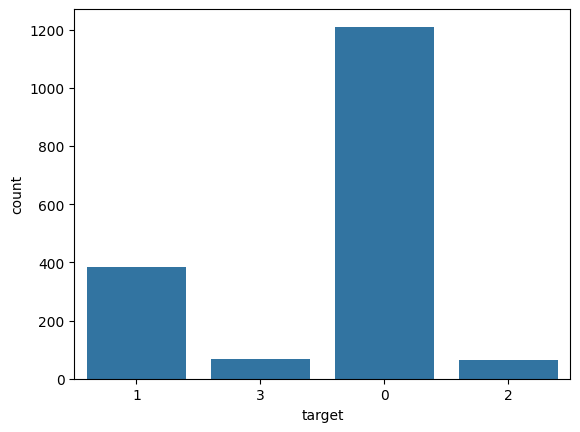

In [15]:
print(df_encoded.describe())
print(df_encoded.corr())
sns.countplot(x='target', data=df_encoded)

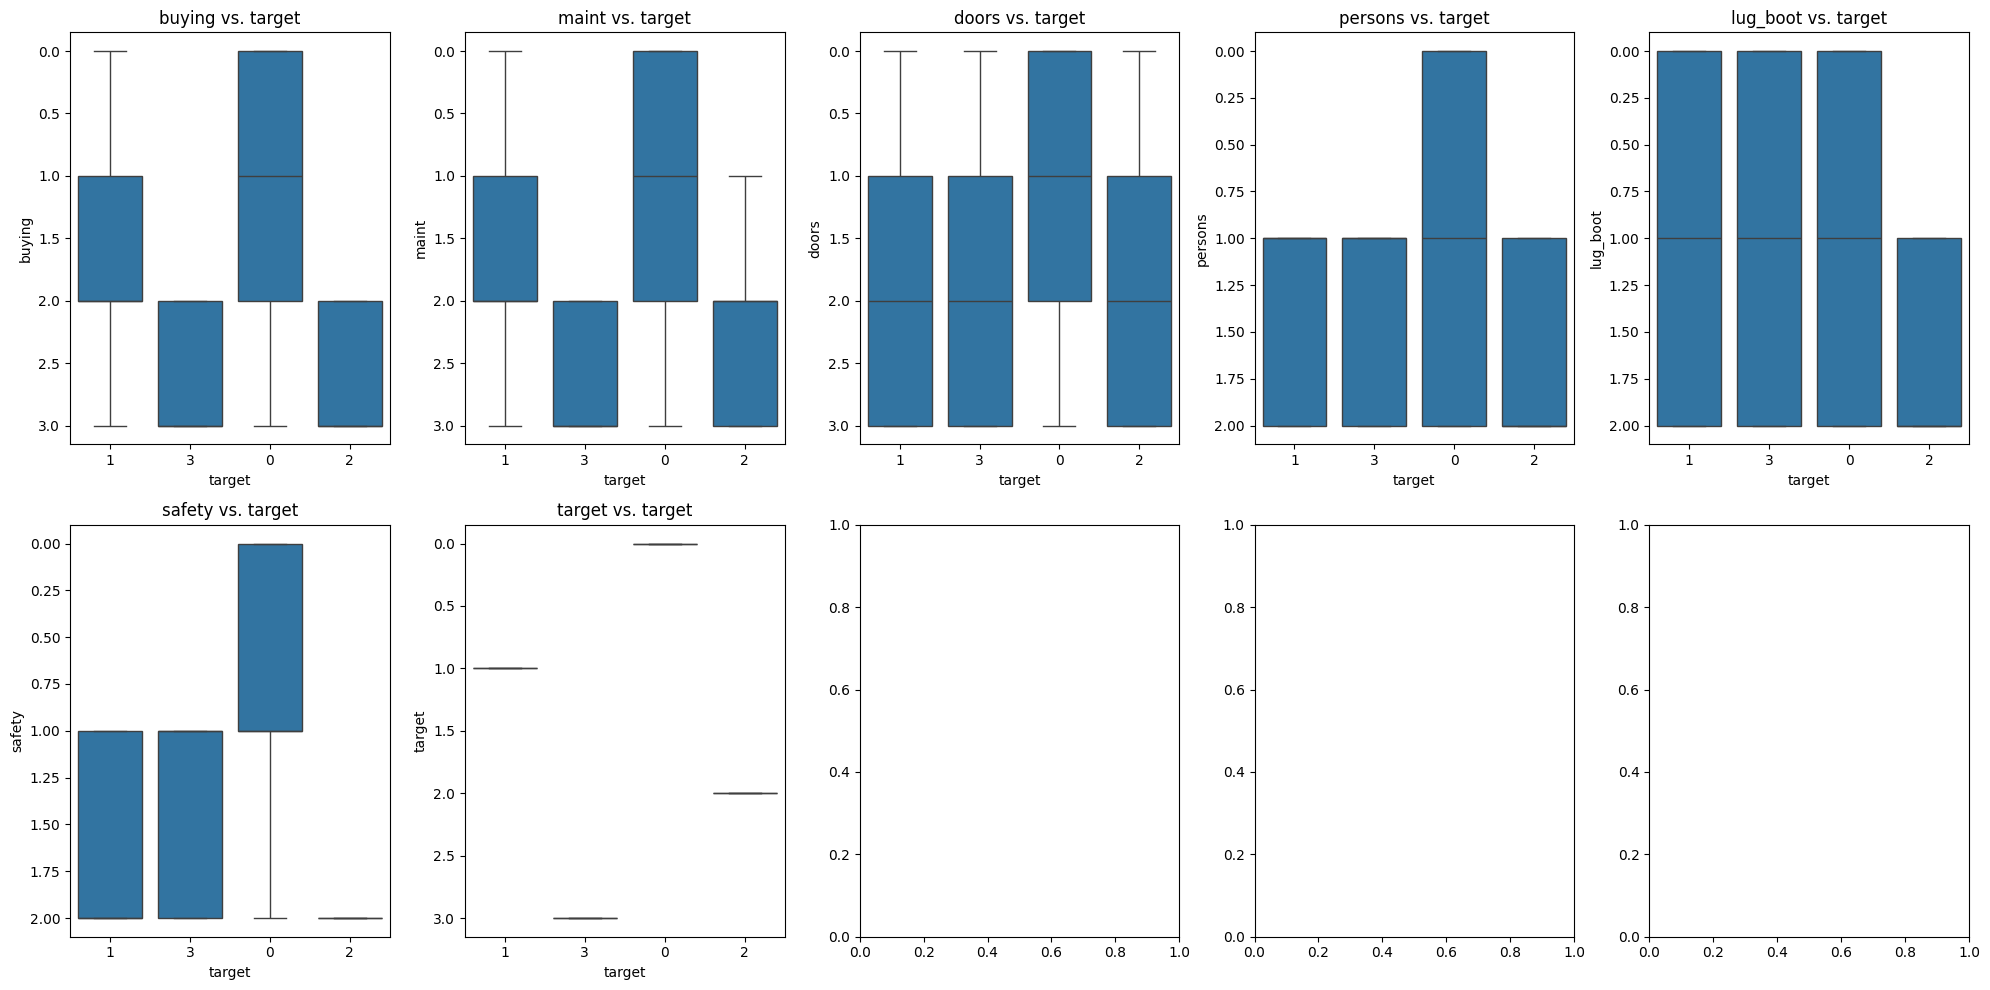

In [18]:
import matplotlib.pyplot as plt
selected_columns = df_encoded.columns[:10].tolist() + ['target']
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(selected_columns[:-1]):
    sns.boxplot(data=df_encoded, x='target', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs. target')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
if 'BinaryClass' in df_encoded.columns:
       df_encoded = df_encoded.drop('BinaryClass', axis=1)

In [23]:
target_df = df_encoded[['target']]

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9653179190751445


In [32]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       0.97      0.90      0.94        83
           2       1.00      0.82      0.90        17
           3       0.56      0.91      0.69        11

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346



In [33]:
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[235   0   0   0]
 [  2  75   0   6]
 [  0   1  14   2]
 [  0   1   0  10]]


In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [35]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

[Text(0.3471153846153846, 0.9615384615384616, 'safety <= 0.5\ngini = 0.452\nsamples = 1382\nvalue = [975.0, 301.0, 48.0, 58.0]\nclass = 0'),
 Text(0.3317307692307692, 0.8846153846153846, 'gini = 0.0\nsamples = 469\nvalue = [469, 0, 0, 0]\nclass = 0'),
 Text(0.33942307692307694, 0.9230769230769231, 'True  '),
 Text(0.3625, 0.8846153846153846, 'persons <= 0.5\ngini = 0.577\nsamples = 913\nvalue = [506.0, 301.0, 48.0, 58.0]\nclass = 0'),
 Text(0.35480769230769227, 0.9230769230769231, '  False'),
 Text(0.3471153846153846, 0.8076923076923077, 'gini = 0.0\nsamples = 298\nvalue = [298, 0, 0, 0]\nclass = 0'),
 Text(0.3778846153846154, 0.8076923076923077, 'buying <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [208, 301, 48, 58]\nclass = 1'),
 Text(0.13846153846153847, 0.7307692307692307, 'maint <= 1.5\ngini = 0.498\nsamples = 313\nvalue = [166, 147, 0, 0]\nclass = 0'),
 Text(0.046153846153846156, 0.6538461538461539, 'buying <= 0.5\ngini = 0.294\nsamples = 151\nvalue = [124, 27, 0, 0]\nclass = 0')

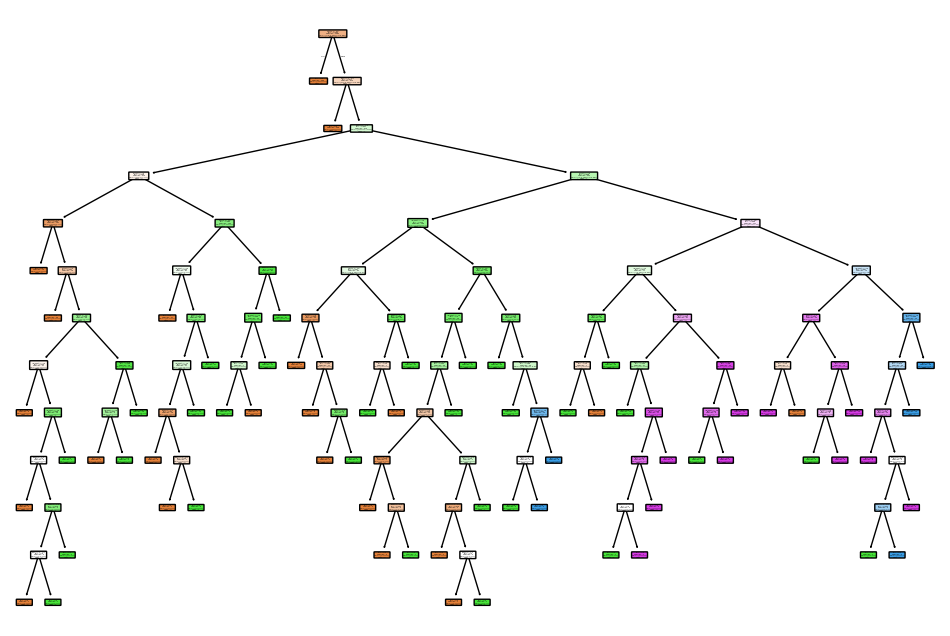

In [38]:

class_names = [str(name) for name in df_encoded['target'].unique()]

plt.figure(figsize=(12, 8))
plot_tree(model,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.728 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf